In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
positive_cases = pd.read_csv('datasets/aggregated_counts.csv')
positive_cases.head(n=5)

,Unnamed: 0,Country/Region,Country Code,Lat,Long,Total Confirmed,Total Positives
0,0,Afghanistan,AFG,33.00,65.00,15197,13417.0
1,1,Albania,ALB,41.15,20.17,12060,11433.0
2,2,Algeria,DZA,28.03,1.66,46533,43575.0
3,3,Andorra,AND,42.51,1.52,15989,15314.0
4,4,Angola,AGO,-11.20,17.87,440,409.0


In [7]:
gdp_density = pd.read_csv('datasets/gdp_per_capita_and_population_density.csv')
gdp_density.rename(columns={"GDP per capita (current US$)":"GDP per capita"}, inplace=True)
gdp_density.head(n=5)

,Unnamed: 0,Country Name,Country Code,GDP per capita,Population density
0,0,Aruba,ABW,25025,573
1,1,Afghanistan,AFG,637,49
2,2,Angola,AGO,5254,20
3,3,Albania,ALB,4413,105
4,4,Andorra,AND,40626,171


In [8]:
data = pd.merge(positive_cases,gdp_density,left_on='Country Code', right_on='Country Code')
data.head(n=5)

,Unnamed: 0_x,Country/Region,Country Code,Lat,Long,Total Confirmed,Total Positives,Unnamed: 0_y,Country Name,GDP per capita,Population density
0,0,Afghanistan,AFG,33.00,65.00,15197,13417.0,1,Afghanistan,637,49
1,1,Albania,ALB,41.15,20.17,12060,11433.0,3,Albania,4413,105
2,2,Algeria,DZA,28.03,1.66,46533,43575.0,58,Algeria,5499,16
3,3,Andorra,AND,42.51,1.52,15989,15314.0,4,Andorra,40626,171
4,4,Angola,AGO,-11.20,17.87,440,409.0,2,Angola,5254,20


In [9]:
data.columns

Index(['Unnamed: 0_x', 'Country/Region', 'Country Code', 'Lat', 'Long',
       'Total Confirmed', 'Total Positives', 'Unnamed: 0_y', 'Country Name',
       'GDP per capita', 'Population density'],
      dtype='object')

In [10]:
populations_data = pd.read_csv('datasets/Populations_and_popdensity.csv')
populations_data

,Country/Region,Population,Density,Urban Population
0,Afghanistan,38928346,60,9732086.50
1,Albania,2877797,105,1813012.11
2,Algeria,43851044,18,32011262.12
3,American Samoa,55191,276,48568.08
4,Andorra,77265,164,67993.20
...,...,...,...,...
230,Wallis & Futuna,11239,80,0.00
231,Western Sahara,597339,2,519684.93
232,Yemen,29825964,56,11333866.32
233,Zambia,18383955,25,8272779.75


In [11]:
data = pd.merge(data, populations_data,left_on='Country/Region', right_on='Country/Region')
data.head(n=5)

,Unnamed: 0_x,Country/Region,Country Code,Lat,Long,Total Confirmed,Total Positives,Unnamed: 0_y,Country Name,GDP per capita,Population density,Population,Density,Urban Population
0,0,Afghanistan,AFG,33.00,65.00,15197,13417.0,1,Afghanistan,637,49,38928346,60,9732086.50
1,1,Albania,ALB,41.15,20.17,12060,11433.0,3,Albania,4413,105,2877797,105,1813012.11
2,2,Algeria,DZA,28.03,1.66,46533,43575.0,58,Algeria,5499,16,43851044,18,32011262.12
3,3,Andorra,AND,42.51,1.52,15989,15314.0,4,Andorra,40626,171,77265,164,67993.20
4,4,Angola,AGO,-11.20,17.87,440,409.0,2,Angola,5254,20,32866272,26,22020402.24


In [12]:
data = data.drop(['Unnamed: 0_x','Country/Region','Unnamed: 0_y', 'Total Confirmed','Population density'], axis=1)
data.head(n=5)

,Country Code,Lat,Long,Total Positives,Country Name,GDP per capita,Population,Density,Urban Population
0,AFG,33.00,65.00,13417.0,Afghanistan,637,38928346,60,9732086.50
1,ALB,41.15,20.17,11433.0,Albania,4413,2877797,105,1813012.11
2,DZA,28.03,1.66,43575.0,Algeria,5499,43851044,18,32011262.12
3,AND,42.51,1.52,15314.0,Andorra,40626,77265,164,67993.20
4,AGO,-11.20,17.87,409.0,Angola,5254,32866272,26,22020402.24


In [13]:
data['Total Positives'] = data['Total Positives'].apply(np.int64)
data.head(n=3)

,Country Code,Lat,Long,Total Positives,Country Name,GDP per capita,Population,Density,Urban Population
0,AFG,33.00,65.00,13417,Afghanistan,637,38928346,60,9732086.50
1,ALB,41.15,20.17,11433,Albania,4413,2877797,105,1813012.11
2,DZA,28.03,1.66,43575,Algeria,5499,43851044,18,32011262.12


In [14]:
columns_titles = ["Country Name","Country Code","Total Positives","GDP per capita","Population","Density","Urban Population","Lat","Long"]
data = data.reindex(columns=columns_titles)
data['Urban Population'] = data['Urban Population'].apply(np.int64)
data.head(n=5)

,Country Name,Country Code,Total Positives,GDP per capita,Population,Density,Urban Population,Lat,Long
0,Afghanistan,AFG,13417,637,38928346,60,9732086,33.00,65.00
1,Albania,ALB,11433,4413,2877797,105,1813012,41.15,20.17
2,Algeria,DZA,43575,5499,43851044,18,32011262,28.03,1.66
3,Andorra,AND,15314,40626,77265,164,67993,42.51,1.52
4,Angola,AGO,409,5254,32866272,26,22020402,-11.20,17.87


In [15]:
print("Population density max: %d" % (data['Density'].max()))
print("Population density min: %d" % (data['Density'].min()))
print("Total Positives max: %d" % (data['Total Positives'].max()))
print("Total Positives min: %d" % (data['Total Positives'].min()))
#data['Population density'].value_counts()
#print(f'Population density max: {data['Population density'].max()}')

Population density max: 26337
Population density min: 0
Total Positives max: 5976159
Total Positives min: 13


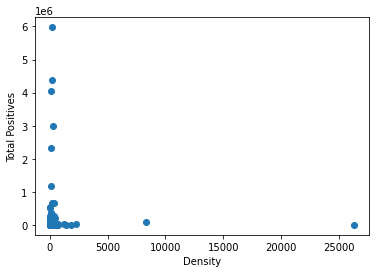

In [16]:
plt.scatter(data['Density'][:],data['Total Positives'][:])
plt.xlabel('Density')
plt.ylabel('Total Positives')
plt.show()

In [17]:
#data[['Total Positives','GDP per capita (current US$)','Population density']]
kmeans = KMeans(n_clusters=3, random_state=42)
result = kmeans.fit(data[['Total Positives','GDP per capita','Population','Density','Urban Population']])
print(kmeans.cluster_centers_)

[[1.57395898e+05 1.83201825e+04 1.68820773e+07 4.04963504e+02
  9.54949659e+06]
 [3.09066450e+06 4.24950000e+03 1.40966408e+09 3.08500000e+02
  6.80494518e+08]
 [1.47367143e+05 1.03270000e+04 1.90459080e+08 3.38142857e+02
  1.16231590e+08]]


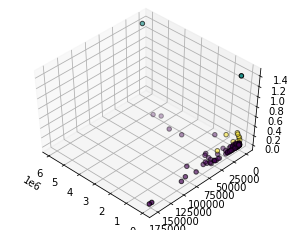

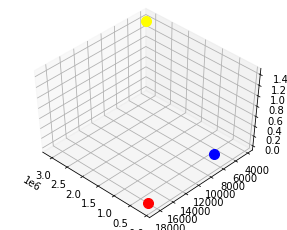

In [69]:
#labels = ['Population','Density','Urban Population']
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Total Positives','GDP per capita','Population']])
ax.scatter(data['Total Positives'], data['GDP per capita'], data['Population'], c=kmeans.labels_.astype(np.float), edgecolor='k')
cluster_centers = kmeans.cluster_centers_
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(cluster_centers[0,0],cluster_centers[0,1],cluster_centers[0,2], s=100, c='red')
ax.scatter(cluster_centers[1,0],cluster_centers[1,1],cluster_centers[1,2], s=100, c='yellow')
ax.scatter(cluster_centers[2,0],cluster_centers[2,1],cluster_centers[2,2], s=100, c='blue')

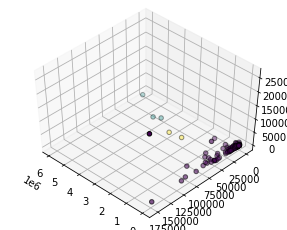

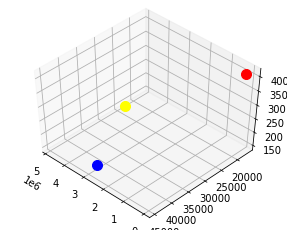

In [66]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Total Positives','GDP per capita','Density']])
labels = kmeans.labels_
ax.scatter(data['Total Positives'], data['GDP per capita'], data['Density'], c=labels.astype(np.float), edgecolor='k')
cluster_centers = kmeans.cluster_centers_
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(cluster_centers[0,0],cluster_centers[0,1],cluster_centers[0,2], s=100, c='red')
ax.scatter(cluster_centers[1,0],cluster_centers[1,1],cluster_centers[1,2], s=100, c='yellow')
ax.scatter(cluster_centers[2,0],cluster_centers[2,1],cluster_centers[2,2], s=100, c='blue')

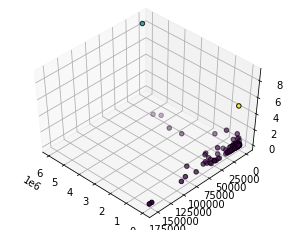

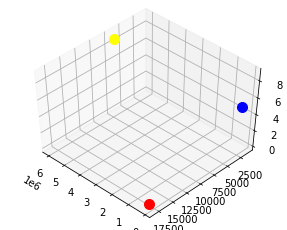

In [65]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Total Positives','GDP per capita','Urban Population']])
labels = kmeans.labels_
ax.scatter(data['Total Positives'], data['GDP per capita'], data['Urban Population'], c=labels.astype(np.float), edgecolor='k')
cluster_centers = kmeans.cluster_centers_
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(cluster_centers[0,0],cluster_centers[0,1],cluster_centers[0,2], s=100, c='red')
ax.scatter(cluster_centers[1,0],cluster_centers[1,1],cluster_centers[1,2], s=100, c='yellow')
ax.scatter(cluster_centers[2,0],cluster_centers[2,1],cluster_centers[2,2], s=100, c='blue')